In [52]:
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.feature_selection import VarianceThreshold


In [81]:
df = pd.read_csv('data_sources//combined_data.csv', converters={'county_fips': lambda x: str(x)})

## Find header columns

In [82]:
df.columns

Index(['county', 'county_ascii', 'county_fips', 'state_id', 'state_name',
       'city_largest', 'city_largest_id', 'lat', 'lng', 'population',
       'density', 'timezone', 'timezone_all', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced',
       'never_married', 'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'home_value', 'rent_median', 'rent_burden',
       'education_less_highschoo

In [83]:
keep_cols = [#'county', 'county_ascii', 
       'county_fips', 
       #'state_id', 'state_name',
       #'city_largest', 'city_largest_id', 
       'lat', 'lng', 'population',
       'density', 'timezone', 'timezone_all', 'age_median', 
       'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 
       'male', 'female', 'married', 'divorced',
       'never_married', 'widowed', 
       'family_size', 'family_dual_income',
       'income_household_median', 
       'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 
       'income_individual_median',
       'home_ownership', 'home_value', 'rent_median', 
       'rent_burden',
       'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 
       'labor_force', 
       'labor_force_average', 'unemployment_rate', 
       'unemployment_rate_average', 
       #'bls_date',
       'race_white', 'race_black', 'race_asian', 'race_native', 'race_pacific',
       'race_other', 'race_multiple', 'hispanic', 'disabled', 'poverty',
       'limited_english', 'commute_time', 'health_uninsured', 'veteran',
       'zips', 'total_precip_mm', 'num_precip_days',
       'num_precip_days_greater_1mm', 
       '0.05_percentile_high',
       '0.25_percentile_high', '0.50_percentile_high', '0.75_percentile_high',
       '0.95_percentile_high', 
       'min_high', 'max_high',
       'crime_rate_per_100000_x', 
       #'crime_rate_per_100000_y'
       ]

In [92]:
df2 = df[keep_cols]

In [100]:
# remove States and extra FIPs
df2[df2.isna().any(axis=1)]


df2.isna().sum()


county_fips                    0
lat                            0
lng                            0
population                     0
density                        0
timezone                       0
timezone_all                   0
age_median                     0
age_under_10                   0
age_10_to_19                   0
age_20s                        0
age_30s                        0
age_40s                        0
age_50s                        0
age_60s                        0
age_70s                        0
age_over_80                    0
male                           0
female                         0
married                        0
divorced                       0
never_married                  0
widowed                        0
family_size                    0
family_dual_income             0
income_household_median        0
income_household_under_5       0
income_household_5_to_10       0
income_household_10_to_15      0
income_household_15_to_20      0
income_hou

In [94]:
pd.set_option("display.max_columns", None)

In [95]:
#drop 46113 and 02270
df2.drop(df2[df2['county_fips'] == '46113'].index, inplace = True)
df2.drop(df2[df2['county_fips'] == '02270'].index, inplace = True)


C:\Users\fusio\anaconda3\envs\py39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
# for remaining NaNs, consider replacing with local means/medians
# for now, drop the rows
df2 = df2.dropna()

In [19]:
import plotly.express as px

fig = px.imshow(df.corr())
fig.show()

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,lat,lng,population,density,age_median,age_under_10,age_70s,age_over_80,male,female,married,divorced,family_size,family_dual_income,income_household_median,income_individual_median,home_ownership,home_value,rent_median,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force,unemployment_rate_average,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,min_high,max_high,crime_rate_per_100000_x
lat,1.000000,-0.264212,-0.086473,-0.006641,0.111627,0.008745,-0.018053,0.123393,0.132121,-0.132120,0.259159,-0.277290,-0.255870,0.402553,0.251929,0.287436,0.111283,0.115765,-0.014116,-0.482843,-0.030976,0.297490,0.212373,0.090465,0.168168,0.204660,-0.079922,-0.075652,0.260747,-0.409949,-0.007125,0.253078,-0.090910,-0.185789,0.007461,-0.340057,-0.249492,-0.331627,-0.220056,-0.306712,-0.345050,0.098822,-0.757419,-0.285926,-0.324442,-0.838646,-0.278047,-0.302257
lng,-0.264212,1.000000,0.004187,0.094499,0.089312,-0.244360,0.037619,0.024977,-0.244171,0.244183,-0.147443,0.074468,-0.174215,-0.114781,-0.068571,-0.034067,0.120136,-0.192902,-0.079424,0.056378,0.236244,-0.408952,-0.078871,0.112983,0.006178,-0.158782,0.003163,0.061788,0.032655,0.311885,-0.168751,-0.295565,-0.270955,-0.205411,-0.343087,-0.296942,0.104287,0.066016,-0.178152,0.358156,-0.196518,-0.098717,0.130609,0.060615,0.072206,0.218050,-0.360957,0.042149
population,-0.086473,0.004187,1.000000,0.302410,-0.182151,0.046952,-0.208337,-0.170831,-0.122684,0.122678,-0.172736,-0.090528,0.182819,0.135377,0.288490,0.247328,-0.298394,0.383437,0.460368,-0.030291,-0.321424,-0.137267,0.303683,0.332915,0.335779,0.154358,0.997535,0.205467,-0.240155,0.120837,0.460867,-0.049832,0.036550,0.228314,0.139802,0.199705,-0.240008,-0.076061,0.275458,0.186282,-0.040427,-0.187999,0.131253,0.104216,0.108009,0.148496,0.170097,0.235414
density,-0.006641,0.094499,0.302410,1.000000,-0.093649,-0.024050,-0.107048,-0.072144,-0.085842,0.085839,-0.154693,-0.066079,0.057324,0.075532,0.179055,0.208300,-0.278521,0.341837,0.288348,-0.019989,-0.185505,-0.173309,0.200955,0.270705,0.245795,0.078491,0.307789,0.108108,-0.170630,0.106570,0.308413,-0.030488,0.003919,0.118584,0.075920,0.066542,-0.122322,-0.022533,0.165235,0.132916,-0.045192,-0.142782,0.022276,0.041454,0.043200,0.075448,-0.000231,0.166825
age_median,0.111627,0.089312,-0.182151,-0.093649,1.000000,-0.647464,0.854256,0.670437,-0.030805,0.030803,0.403189,0.224507,-0.558181,-0.281677,-0.156136,-0.058241,0.552347,-0.077670,-0.252264,-0.177222,0.270130,0.140437,-0.141833,-0.178865,-0.167770,0.044276,-0.185262,-0.003990,0.355233,-0.181586,-0.231554,-0.171256,0.001297,-0.240131,-0.156970,-0.305256,0.411640,-0.202359,-0.331266,0.109723,-0.225230,0.427125,-0.152412,-0.060774,-0.067546,-0.086777,-0.165860,-0.247263
age_under_10,0.008745,-0.244360,0.046952,-0.024050,-0.647464,1.000000,-0.551974,-0.351004,-0.102821,0.102824,0.039503,-0.220375,0.529904,0.222750,0.071037,0.074797,-0.213307,-0.112211,0.000325,0.220156,-0.074602,0.071100,-0.059994,-0.181881,-0.120701,-0.143106,0.046664,-0.116150,-0.204831,0.005904,0.017734,0.279484,-0.040800,0.217036,0.060525,0.289714,-0.298415,0.099493,0.325208,-0.184675,0.333730,-0.261857,0.050168,-0.047345,-0.045381,-0.066983,0.203511,0.109592
age_70s,-0.018053,0.037619,-0.208337,-0.107048,0.854256,-0.551974,1.000000,0.585305,-0.062762,0.062755,0.297942,0.233462,-0.454352,-0.434122,-0.316781,-0.256934,0.452470,-0.144093,-0.320876,-0.054026,0.233771,0.125283,-0.205536,-0.188403,-0.209973,-0.016561,-0.216171,-0.001421,0.301597,-0.155210,-0.285660,-0.115413,-0.071714,-0.174437,-0.138954,-0.185726,0.474455,-0.015442,-0.238241,0.038833,-0.071811,0.439865,-0.038289,-0.024839,-0.026418,0.016856,-0.055267,-0.169996
age_over_80,0.123393,0.024977,-0.170831,-0.072144,0.670437,-0.3

<AxesSubplot:>

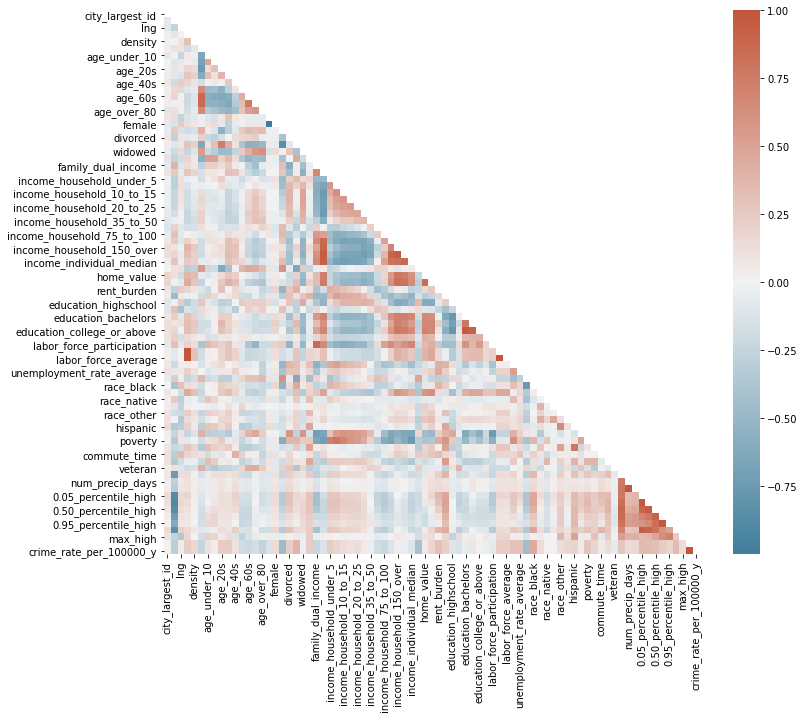

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

<AxesSubplot:>

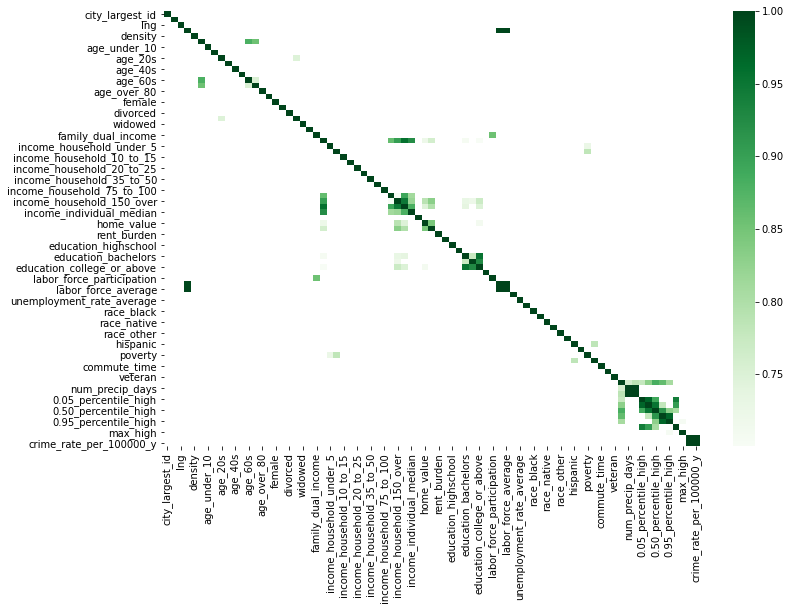

In [31]:
corr = df.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

## Check variance

<AxesSubplot:>

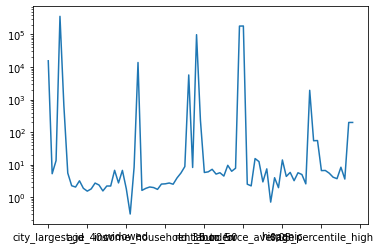

In [37]:
#df.var(axis=0)
df.std(axis=0).plot(logy=True)


In [39]:
column_order = df.std().sort_values(ascending=False).index

column_order

Index(['population', 'labor_force_average', 'labor_force', 'home_value',
       'city_largest_id', 'income_household_median',
       'income_individual_median', 'total_precip_mm', 'density', 'rent_median',
       'crime_rate_per_100000_y', 'crime_rate_per_100000_x',
       'num_precip_days_greater_1mm', 'num_precip_days', 'race_white',
       'hispanic', 'lng', 'race_black', 'education_college_or_above',
       'income_household_six_figure', 'family_dual_income', 'min_high',
       'home_ownership', 'labor_force_participation', 'race_native',
       'education_highschool', 'married', 'never_married',
       '0.25_percentile_high', '0.05_percentile_high', 'education_stem_degree',
       'education_less_highschool', 'poverty', 'rent_burden',
       'education_bachelors', 'commute_time', 'income_household_150_over',
       'age_median', '0.50_percentile_high', 'lat', 'education_some_college',
       'health_uninsured', 'education_graduate', 'disabled',
       '0.75_percentile_high', 'race

In [50]:
pd.set_option('display.max_rows', 500)

#df[column_order].std()
df.describe()

,city_largest_id,lat,lng,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,crime_rate_per_100000_y
count,2.558000e+03,2559.000000,2559.000000,2.559000e+03,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,...,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.00000,2561.000000,2561.000000
mean,1.840014e+09,38.902598,-93.266698,1.169457e+05,98.422782,41.491364,11.939195,12.812114,12.152403,11.724853,...,321.994924,3.004666,10.921906,19.037993,27.264604,31.000781,-6.241273,36.61640,240.066635,240.066635
std,1.552324e+04,5.289345,13.361371,3.599965e+05,651.699248,5.531059,2.259720,2.061314,3.209154,1.881578,...,55.197207,6.589952,6.654339,5.497885,4.134698,3.724434,8.366833,3.63143,198.492854,198.492854
min,1.840000e+09,19.598700,-164.027200,6.600000e+01,0.010000,22.300000,1.500000,4.500000,2.600000,3.200000,...,2.000000,-32.800000,-16.400000,-3.300000,0.000000,1.100000,-48.300000,2.80000,0.000000,0.000000
25%,1.840006e+09,35.274000,-99.610850,1.165300e+04,5.630000,38.100000,10.500000,11.600000,10.300000,10.600000,...,306.000000,-1.400000,5.600000,15.000000,25.000000,29.400000,-11.700000,35.00000,103.126957,103.126957
50%,1.840014e+09,38.996900,-91.913400,2.928500e+04,17.380000,41.300000,11.900000,12.800000,11.700000,11.600000,...,338.000000,2.200000,10.600000,18.900000,27.750000,31.150000,-6.700000,36.10000,190.945488,190.945488
75%,1.840020e+09,42.388300,-83.742200,8.030850e+04,48.060000,44.600000,13.100000,13.900000,13.100000,12.700000,...,359.000000,7.250000,15.850000,23.050000,30.000000,33.050000,0.000000,37.80000,325.989800,325.989800
max,1.840152e+09,69.312200,-67.628800,1.008157e+07,27806.770000,67.400000,24.500000,26.000000,35.400000,21.000000,...,366.000000,28.900000,33.900000,36.100000,41.100000,44.150000,25.000000,54.40000,1754.914968,1754.914968


In [67]:
import pandas as pd
import scipy as sp
import numpy as np

In [71]:
# remove state rows

df[df.isna().any(axis=1)]


,county,county_ascii,county_fips,state_id,state_name,city_largest,city_largest_id,lat,lng,population,...,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,crime_rate_per_100000_y
2,Kenedy,Kenedy,48261,TX,Texas,Sarita,1.840026e+09,26.9285,-97.7017,568.0,...,31.0,14.40,20.00,25.00,27.20,28.90,11.1,30.6,1456.310680,1456.310680
288,De Baca,De Baca,35011,NM,New Mexico,Fort Sumner,1.840023e+09,34.3425,-104.4120,2040.0,...,361.0,7.80,16.70,26.10,34.40,37.20,-4.4,43.3,471.945464,471.945464
505,Kent,Kent,48263,TX,Texas,Jayton,1.840019e+09,33.1813,-100.7776,647.0,...,363.0,7.80,18.30,27.20,35.60,38.30,-3.3,45.6,371.747212,371.747212
792,Eureka,Eureka,32011,NV,Nevada,Crescent Valley,1.840024e+09,39.9839,-116.2686,1859.0,...,351.0,1.70,8.90,18.30,28.30,32.20,-11.2,40.6,289.017341,289.017341
1096,Keweenaw,Keweenaw,26083,MI,Michigan,Ahmeek,1.840011e+09,47.6279,-88.4346,2111.0,...,257.0,-5.85,0.00,7.25,19.45,24.70,-17.2,33.9,228.206299,228.206299
1127,Terrell,Terrell,48443,TX,Texas,Sanderson,1.840020e+09,30.2250,-102.0765,896.0,...,358.0,13.30,22.20,29.40,35.60,38.30,1.1,43.3,221.483942,221.483942
1430,Prairie,Prairie,30079,MT,Montana,Terry,1.840022e+09,46.8605,-105.3780,1252.0,...,306.0,-5.55,5.00,14.70,25.55,31.40,-21.7,39.4,169.635284,169.635284
1511,Borden,Borden,48033,TX,Texas,Gail,1.840025e+09,32.7436,-101.4317,613.0,...,312.0,9.40,19.40,26.10,33.90,37.20,-0.6,43.9,156.985871,156.985871
1828,Craig,Craig,51045,VA,Virginia,New Castle,1.840006e+09,37.4817,-80.2114,5110.0,...,349.0,1.70,10.60,17.80,25.60,28.90,-5.0,32.8,115.163148,115.163148
2009,Jeff Davis,Jeff Davis,48243,TX,Texas,Fort Davis,1.840018e+09,30.7154,-104.1400,2241.0,...,362.0,10.55,19.75,26.95,33.05,35.55,-3.9,41.1,88.770528,88.770528


In [103]:
df2.dtypes

county_fips                     object
lat                            float64
lng                            float64
population                     float64
density                        float64
timezone                        object
timezone_all                    object
age_median                     float64
age_under_10                   float64
age_10_to_19                   float64
age_20s                        float64
age_30s                        float64
age_40s                        float64
age_50s                        float64
age_60s                        float64
age_70s                        float64
age_over_80                    float64
male                           float64
female                         float64
married                        float64
divorced                       float64
never_married                  float64
widowed                        float64
family_size                    float64
family_dual_income             float64
income_household_median  

In [104]:
# drop all non-numeric values
drop_col = ['county_fips',
'zips',
'timezone',
'timezone_all']

df_test = df2.drop(drop_col, axis = 1)

In [106]:
df_test.head()

,lat,lng,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,labor_force,labor_force_average,unemployment_rate,unemployment_rate_average,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x
0,35.2079,-90.3089,48672.0,30.79,35.2,15.4,14.2,13.5,12.8,11.4,12.4,11.4,5.5,3.1,47.6,52.4,39.1,17.7,35.9,7.3,3.18,43.3,40161.0,3.6,4.5,6.8,8.9,7.8,12.8,13.6,15.9,10.7,10.6,4.9,15.5,23938.0,57.4,110340.0,732.0,34.1,17.4,34.8,30.4,11.9,5.5,17.4,37.6,61.5,21311.0,21208.0,8.8,8.8,43.5,48.0,0.7,0.3,0.0,0.4,7.1,2.6,16.8,22.2,1.0,20.3,8.4,6.6,7692.0,344.0,343.0,6.65,15.30,23.35,30.30,33.3,-2.2,35.6,1754.914968
1,37.1915,-89.3375,6260.0,10.27,45.3,12.8,13.1,9.0,9.3,11.2,15.7,15.1,10.0,3.8,47.8,52.2,40.6,16.7,32.1,10.7,3.72,28.7,36806.0,5.1,6.1,7.8,6.9,8.4,13.2,17.0,18.5,9.4,4.5,3.0,7.5,21845.0,73.7,55152.0,526.0,26.6,13.5,40.7,32.9,9.9,3.0,12.9,29.9,45.7,1911.0,1941.0,7.1,9.6,63.2,33.5,0.0,0.6,0.6,0.4,1.9,1.3,22.2,25.3,0.0,30.3,7.7,10.3,7242.0,356.0,353.0,3.90,12.80,20.00,28.90,32.2,-3.3,35.0,1664.700485
3,39.3051,-76.6144,609032.0,2904.98,35.4,12.1,11.2,17.0,16.0,11.0,12.7,11.0,5.6,3.3,47.0,53.0,26.7,14.5,52.5,6.4,3.42,47.5,50379.0,5.5,5.9,6.1,5.5,4.4,10.0,12.3,16.3,10.8,12.2,11.0,23.2,29943.0,47.5,159116.0,1073.0,37.7,14.8,29.1,24.2,16.8,15.1,31.9,47.4,62.0,282198.0,285891.0,8.3,8.7,30.5,62.4,2.6,0.3,0.0,1.8,2.5,5.3,15.5,21.2,2.0,31.4,6.6,5.8,4617.0,259.0,259.0,5.00,11.15,16.35,23.35,27.5,-0.6,36.1,1419.537569
4,35.1840,-89.8955,936374.0,473.49,35.6,13.8,13.8,14.8,13.4,12.3,12.6,11.0,5.4,2.9,47.5,52.5,39.0,13.9,41.6,5.4,3.38,48.8,51657.0,4.9,3.7,5.9,5.6,5.4,10.2,13.1,17.1,10.9,12.3,10.9,23.2,28181.0,55.1,148187.0,942.0,35.2,11.6,27.5,29.3,18.9,12.7,31.6,39.8,64.7,471469.0,451667.0,7.1,9.6,39.1,53.7,2.6,0.2,0.0,2.7,1.7,6.4,12.5,19.3,1.8,22.8,11.5,7.2,8232.0,365.0,363.0,6.95,16.10,22.80,30.60,33.3,-1.7,37.2,1315.003752
5,39.4469,-119.5293,3988.0,5.83,50.9,10.0,9.7,8.1,7.4,13.1,15.8,17.1,16.3,2.5,52.9,47.1,54.1,17.9,22.6,5.4,2.84,49.3,66292.0,0.0,0.0,4.2,3.3,1.9,6.8,17.3,25.6,9.9,17.1,13.9,31.0,36864.0,90.4,241630.0,669.0,18.1,6.4,27.8,34.5,21.8,9.6,31.4,52.2,50.9,1999.0,1967.0,3.0,8.7,87.6,1.7,0.9,0.4,0.0,0.2,9.2,3.2,19.7,8.2,0.0,28.9,10.1,14.5,4997.0,296.0,294.0,2.20,8.30,16.10,26.10,30.0,-3.3,33.9,1217.656012


In [107]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df_test
df_x['mahala'] = mahalanobis(x=df_x, data=df_test)
df_x.head()

,lat,lng,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,labor_force,labor_force_average,unemployment_rate,unemployment_rate_average,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,mahala
0,35.2079,-90.3089,48672.0,30.79,35.2,15.4,14.2,13.5,12.8,11.4,12.4,11.4,5.5,3.1,47.6,52.4,39.1,17.7,35.9,7.3,3.18,43.3,40161.0,3.6,4.5,6.8,8.9,7.8,12.8,13.6,15.9,10.7,10.6,4.9,15.5,23938.0,57.4,110340.0,732.0,34.1,17.4,34.8,30.4,11.9,5.5,17.4,37.6,61.5,21311.0,21208.0,8.8,8.8,43.5,48.0,0.7,0.3,0.0,0.4,7.1,2.6,16.8,22.2,1.0,20.3,8.4,6.6,7692.0,344.0,343.0,6.65,15.30,23.35,30.30,33.3,-2.2,35.6,1754.914968,-49.053427
1,37.1915,-89.3375,6260.0,10.27,45.3,12.8,13.1,9.0,9.3,11.2,15.7,15.1,10.0,3.8,47.8,52.2,40.6,16.7,32.1,10.7,3.72,28.7,36806.0,5.1,6.1,7.8,6.9,8.4,13.2,17.0,18.5,9.4,4.5,3.0,7.5,21845.0,73.7,55152.0,526.0,26.6,13.5,40.7,32.9,9.9,3.0,12.9,29.9,45.7,1911.0,1941.0,7.1,9.6,63.2,33.5,0.0,0.6,0.6,0.4,1.9,1.3,22.2,25.3,0.0,30.3,7.7,10.3,7242.0,356.0,353.0,3.90,12.80,20.00,28.90,32.2,-3.3,35.0,1664.700485,-172.065832
3,39.3051,-76.6144,609032.0,2904.98,35.4,12.1,11.2,17.0,16.0,11.0,12.7,11.0,5.6,3.3,47.0,53.0,26.7,14.5,52.5,6.4,3.42,47.5,50379.0,5.5,5.9,6.1,5.5,4.4,10.0,12.3,16.3,10.8,12.2,11.0,23.2,29943.0,47.5,159116.0,1073.0,37.7,14.8,29.1,24.2,16.8,15.1,31.9,47.4,62.0,282198.0,285891.0,8.3,8.7,30.5,62.4,2.6,0.3,0.0,1.8,2.5,5.3,15.5,21.2,2.0,31.4,6.6,5.8,4617.0,259.0,259.0,5.00,11.15,16.35,23.35,27.5,-0.6,36.1,1419.537569,235.148427
4,35.1840,-89.8955,936374.0,473.49,35.6,13.8,13.8,14.8,13.4,12.3,12.6,11.0,5.4,2.9,47.5,52.5,39.0,13.9,41.6,5.4,3.38,48.8,51657.0,4.9,3.7,5.9,5.6,5.4,10.2,13.1,17.1,10.9,12.3,10.9,23.2,28181.0,55.1,148187.0,942.0,35.2,11.6,27.5,29.3,18.9,12.7,31.6,39.8,64.7,471469.0,451667.0,7.1,9.6,39.1,53.7,2.6,0.2,0.0,2.7,1.7,6.4,12.5,19.3,1.8,22.8,11.5,7.2,8232.0,365.0,363.0,6.95,16.10,22.80,30.60,33.3,-1.7,37.2,1315.003752,121.542711
5,39.4469,-119.5293,3988.0,5.83,50.9,10.0,9.7,8.1,7.4,13.1,15.8,17.1,16.3,2.5,52.9,47.1,54.1,17.9,22.6,5.4,2.84,49.3,66292.0,0.0,0.0,4.2,3.3,1.9,6.8,17.3,25.6,9.9,17.1,13.9,31.0,36864.0,90.4,241630.0,669.0,18.1,6.4,27.8,34.5,21.8,9.6,31.4,52.2,50.9,1999.0,1967.0,3.0,8.7,87.6,1.7,0.9,0.4,0.0,0.2,9.2,3.2,19.7,8.2,0.0,28.9,10.1,14.5,4997.0,296.0,294.0,2.20,8.30,16.10,26.10,30.0,-3.3,33.9,1217.656012,453.787409


In [111]:
df_x[(df_x.mahala > 400.00) & (df_x.mahala < 415.00)]

#df[(df.a != -1) & (df.b != -1)]

,lat,lng,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,labor_force,labor_force_average,unemployment_rate,unemployment_rate_average,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,total_precip_mm,num_precip_days,num_precip_days_greater_1mm,0.05_percentile_high,0.25_percentile_high,0.50_percentile_high,0.75_percentile_high,0.95_percentile_high,min_high,max_high,crime_rate_per_100000_x,mahala
330,34.3207,-118.2248,10081570.0,959.07,36.5,12.0,12.6,15.5,14.7,13.5,12.8,10.0,5.3,3.5,49.3,50.7,42.9,10.5,41.7,4.9,3.66,56.3,68044.0,3.3,2.3,4.8,4.1,4.3,8.1,11.2,15.9,12.3,15.8,18.0,33.8,29985.0,45.8,582840.0,1460.0,35.8,20.9,20.6,26.0,21.2,11.3,32.5,43.9,64.7,4896159.0,4969445.0,6.1,13.4,51.3,8.1,14.6,0.7,0.3,21.0,4.0,48.5,9.9,14.9,12.7,31.8,9.6,3.3,8667.0,365.0,365.0,13.3,18.3,23.6,30.6,33.85,-2.2,48.9,444.800814,405.694219
1189,38.3266,-103.7845,5754.0,2.82,35.4,6.8,14.9,17.3,17.0,13.0,12.0,10.8,4.8,3.3,63.5,36.5,36.0,18.1,41.9,4.0,4.60,49.1,42135.0,6.3,2.5,6.2,4.3,7.1,17.2,14.5,19.8,14.6,3.8,3.6,7.4,18032.0,72.5,77876.0,914.0,33.9,13.9,42.6,34.5,7.2,1.9,9.1,56.1,44.4,1532.0,1420.0,14.8,5.8,88.6,3.5,0.6,1.4,0.0,1.1,4.8,31.9,24.6,27.9,1.7,21.4,6.2,8.7,7811.0,344.0,343.0,1.7,12.2,23.3,32.2,36.10,-11.1,40.0,206.689215,408.305200
